# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [147]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [148]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 601


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [149]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&units=metric" + "&q=" + city 
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | amga
Processing Record 2 of Set 1 | howrah
Processing Record 3 of Set 1 | guilin
Processing Record 4 of Set 1 | tazovsky
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | hobyo
Processing Record 7 of Set 1 | quatre cocos
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | viqueque
Processing Record 10 of Set 1 | puerto natales
Processing Record 11 of Set 1 | kuanda
Processing Record 12 of Set 1 | edinburgh of the seven seas
Processing Record 13 of Set 1 | kinablangan
Processing Record 14 of Set 1 | longyearbyen
Processing Record 15 of Set 1 | tobi village
City not found. Skipping...
Processing Record 16 of Set 1 | vorgashor
Processing Record 17 of Set 1 | rattvik
City not found. Skipping...
Processing Record 18 of Set 1 | bethel
Processing Record 19 of Set 1 | vredendal
Processing Record 20 of Set 1 | broken hill
Processing Record 21 of Set 1 | ancud
Proc

Processing Record 37 of Set 4 | el calafate
Processing Record 38 of Set 4 | ola
Processing Record 39 of Set 4 | cruzeiro do sul
Processing Record 40 of Set 4 | sai kung
Processing Record 41 of Set 4 | thunder bay
Processing Record 42 of Set 4 | harstad
Processing Record 43 of Set 4 | saint-francois
Processing Record 44 of Set 4 | port lincoln
Processing Record 45 of Set 4 | nola
Processing Record 46 of Set 4 | broome
Processing Record 47 of Set 4 | pauini
Processing Record 48 of Set 4 | egilsstadir
Processing Record 49 of Set 4 | kingston
Processing Record 0 of Set 5 | kapuskasing
Processing Record 1 of Set 5 | inari
Processing Record 2 of Set 5 | usogorsk
Processing Record 3 of Set 5 | kruisfontein
Processing Record 4 of Set 5 | kwang binh
Processing Record 5 of Set 5 | peterhead
Processing Record 6 of Set 5 | san juan del cesar
Processing Record 7 of Set 5 | crane
Processing Record 8 of Set 5 | the bottom
Processing Record 9 of Set 5 | east london
Processing Record 10 of Set 5 | kuta

Processing Record 29 of Set 8 | meadow lake
Processing Record 30 of Set 8 | xai-xai
Processing Record 31 of Set 8 | les anglais
Processing Record 32 of Set 8 | mahanoro
Processing Record 33 of Set 8 | nowy dwor gdanski
Processing Record 34 of Set 8 | fale old settlement
Processing Record 35 of Set 8 | dame-marie
Processing Record 36 of Set 8 | antsiranana
Processing Record 37 of Set 8 | kyren
Processing Record 38 of Set 8 | kupang
Processing Record 39 of Set 8 | touros
Processing Record 40 of Set 8 | mukalla
Processing Record 41 of Set 8 | lillehammer
Processing Record 42 of Set 8 | buka
Processing Record 43 of Set 8 | kenai
Processing Record 44 of Set 8 | east ballina
Processing Record 45 of Set 8 | pointe-noire
Processing Record 46 of Set 8 | freeport
Processing Record 47 of Set 8 | rafsanjan
Processing Record 48 of Set 8 | inverloch
Processing Record 49 of Set 8 | balkashino
Processing Record 0 of Set 9 | awjilah
Processing Record 1 of Set 9 | misratah
Processing Record 2 of Set 9 |

Processing Record 21 of Set 12 | parras de la fuente
Processing Record 22 of Set 12 | north battleford
Processing Record 23 of Set 12 | kristinestad
Processing Record 24 of Set 12 | knyaze-volkonskoye
Processing Record 25 of Set 12 | menzelinsk
Processing Record 26 of Set 12 | cacador
Processing Record 27 of Set 12 | robit
Processing Record 28 of Set 12 | chamical
Processing Record 29 of Set 12 | kristiansund
Processing Record 30 of Set 12 | arkhangel'sk
Processing Record 31 of Set 12 | coahuayana de hidalgo
Processing Record 32 of Set 12 | simsbury center
Processing Record 33 of Set 12 | tadine
Processing Record 34 of Set 12 | abaza
Processing Record 35 of Set 12 | mozarlandia
Processing Record 36 of Set 12 | kolonia
Processing Record 37 of Set 12 | laguna
Processing Record 38 of Set 12 | berezovyy
Processing Record 39 of Set 12 | sliven
Processing Record 40 of Set 12 | maitum
Processing Record 41 of Set 12 | balakhta
Processing Record 42 of Set 12 | maravatio de ocampo
Processing Rec

In [150]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64

In [151]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,amga,60.8953,131.9608,-5.88,97,100,0.75,RU,1681935785
1,howrah,22.5892,88.3103,30.00,84,40,3.60,IN,1681935786
2,guilin,25.2819,110.2864,19.06,90,0,1.07,CN,1681935786
3,tazovsky,67.4667,78.7000,-11.20,98,99,2.02,RU,1681935487
4,grytviken,-54.2811,-36.5092,3.33,95,100,1.85,GS,1681935482


In [152]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [153]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,amga,60.8953,131.9608,-5.88,97,100,0.75,RU,1681935785
1,howrah,22.5892,88.3103,30.00,84,40,3.60,IN,1681935786
2,guilin,25.2819,110.2864,19.06,90,0,1.07,CN,1681935786
3,tazovsky,67.4667,78.7000,-11.20,98,99,2.02,RU,1681935487
4,grytviken,-54.2811,-36.5092,3.33,95,100,1.85,GS,1681935482


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

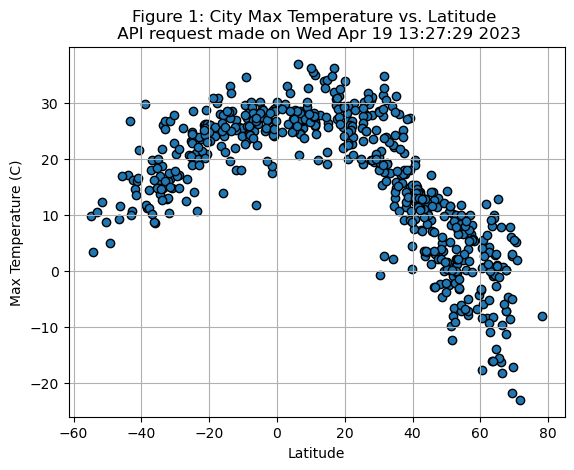

In [154]:
# Build scatter plot for latitude vs. temperature
x_lat = city_data_df['Lat']
y_temp = city_data_df['Max Temp']



# Get the time from the first entry, to use on the chart title
data_time = time.ctime(city_data_df['Date'].max())

# Incorporate the other graph properties
fig1 = plt.figure()
plt.scatter(x_lat, y_temp, edgecolors='black')
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"Figure 1: City Max Temperature vs. Latitude \n API request made on {data_time}")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

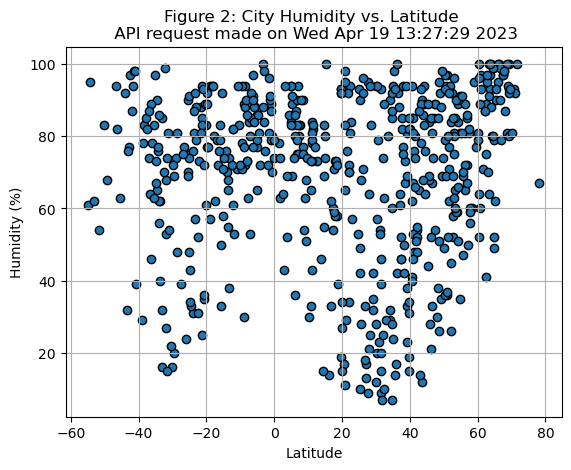

In [155]:
# Build the scatter plots for latitude vs. humidity
y_humidity = city_data_df['Humidity']

# Incorporate the other graph properties
fig2 = plt.figure()
plt.scatter(x_lat, y_humidity, edgecolors='black')
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"Figure 2: City Humidity vs. Latitude \n API request made on {data_time}")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

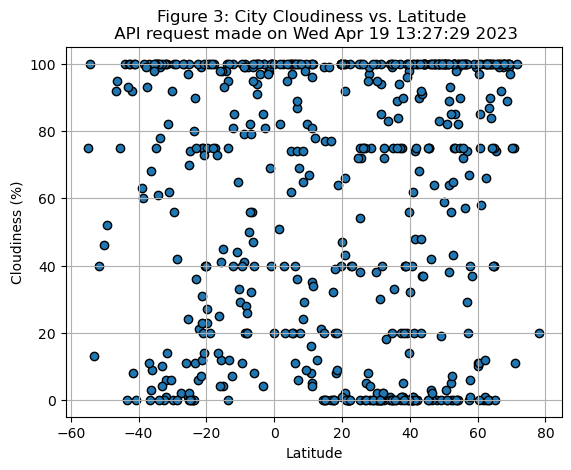

In [156]:
# Build the scatter plots for latitude vs. cloudiness
y_clouds = city_data_df['Cloudiness']

# Incorporate the other graph properties
fig3 = plt.figure()
plt.scatter(x_lat, y_clouds, edgecolors='black')
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"Figure 3: City Cloudiness vs. Latitude \n API request made on {data_time}")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

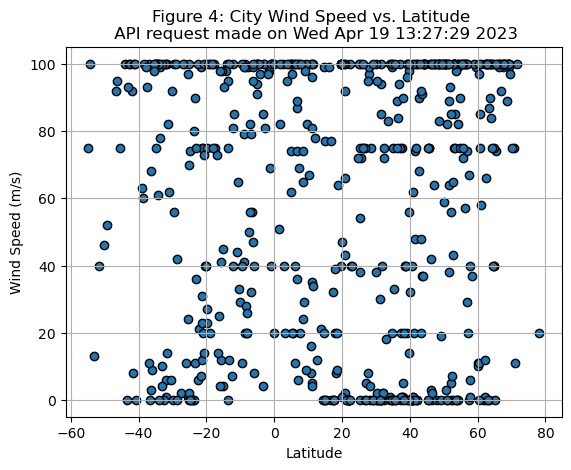

In [157]:
# Build the scatter plots for latitude vs. wind speed
y_wind = city_data_df['Wind Speed']

# Incorporate the other graph properties
fig4 = plt.figure()
plt.scatter(x_lat, y_clouds, edgecolors='black')
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"Figure 4: City Wind Speed vs. Latitude \n API request made on {data_time}")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [158]:
# Define a function to create Linear Regression plots
def lat_linregress(x_data, y_data):
    p_slope, p_int, p_r, p_p, p_std_err = linregress(x_data, y_data)
    p_fit = p_slope * x_data + p_int
    plt.scatter(x_data, y_data)
    plt.plot(x_data, p_fit, color='red')
    line_eq = "y = " + str(round(p_slope,2)) + "x + " + str(round(p_int,2))
    plt.annotate(line_eq,(x_data.min(), y_data.max()),fontsize=15,color="red")
    print(f"The r-squared value is: {p_r**2}")
    plt.xlabel('Latitude')
    plt.ylabel(y_data.name)
    plt.title(f"{y_data.name} vs Latitude \n (with linear regression)")

The r-squared value is: 0.352787793182729


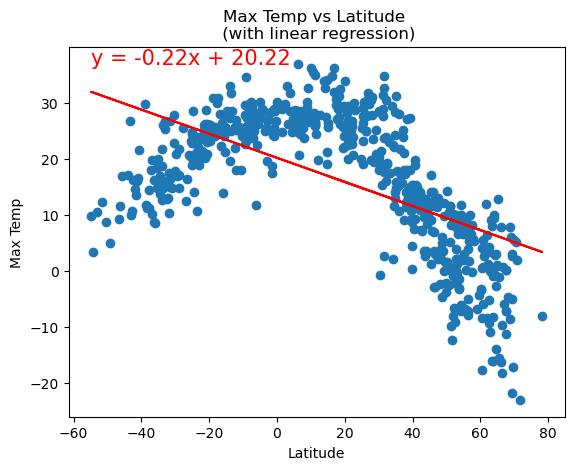

In [159]:
#lat_linregress(city_data_df['Max Temp'])
lat_linregress(city_data_df['Lat'], city_data_df['Max Temp'])

In [160]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,amga,60.8953,131.9608,-5.88,97,100,0.75,RU,1681935785
1,howrah,22.5892,88.3103,30.00,84,40,3.60,IN,1681935786
2,guilin,25.2819,110.2864,19.06,90,0,1.07,CN,1681935786
3,tazovsky,67.4667,78.7000,-11.20,98,99,2.02,RU,1681935487
5,hobyo,5.3505,48.5268,28.81,69,100,5.78,SO,1681935695


In [161]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,grytviken,-54.2811,-36.5092,3.33,95,100,1.85,GS,1681935482
6,quatre cocos,-20.2078,57.7625,26.16,83,40,6.03,MU,1681935788
7,adamstown,-25.0660,-130.1015,24.90,75,70,3.55,PN,1681935475
8,viqueque,-8.8673,126.3658,23.48,89,79,1.73,TL,1681935788
9,puerto natales,-51.7236,-72.4875,12.25,54,40,13.38,CL,1681935371


###  Temperature vs. Latitude Linear Regression Plot

The r-squared value is: 0.7409280335876488


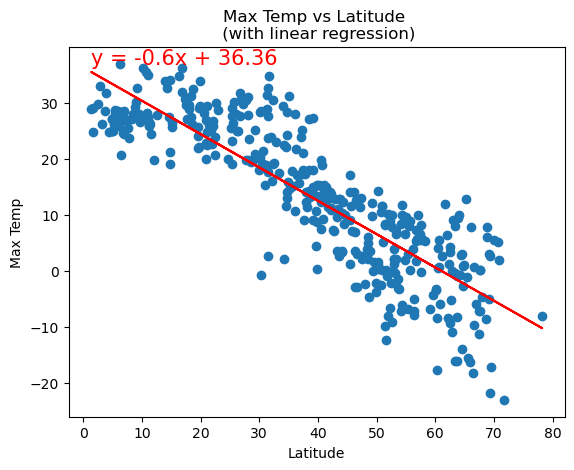

In [162]:
# Linear regression on Northern Hemisphere
lat_linregress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])

The r-squared value is: 0.5104509636163055


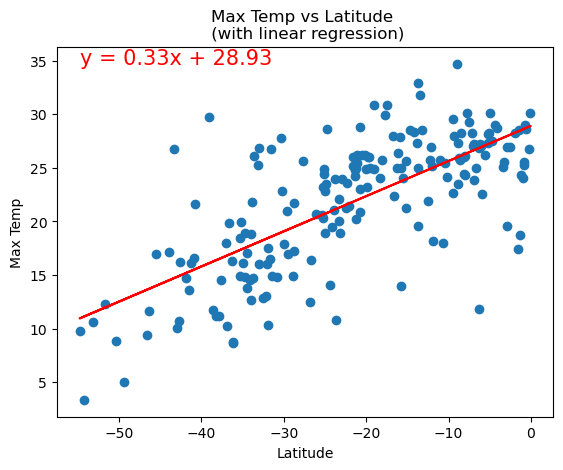

In [163]:
# Linear regression on Southern Hemisphere
lat_linregress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])

**Discussion about the linear relationship:** Maximum Temperature shows a linear relationship to Latitude in each hemisphere, more strongly in the Northern Hemisphere with an r-squared value of ~0.75 than in the Southern Hemisphere at ~0.50.  Interestingly, this data for the Northern Hemisphere subjectively shows a slight curvature, with the highest temperatures occuring at around 15 degrees latitude.  It would be interesting to see if this holds with a much larger data set (and/or if a similar effect might be seen in the Southern Hemisphere with more data), if it has any dependency on Longitude, and if this varies during the year.

### Humidity vs. Latitude Linear Regression Plot

The r-squared value is: 0.04604888691432551


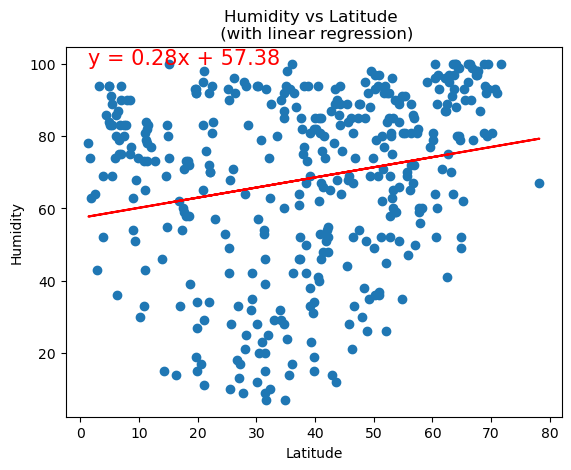

In [164]:
# Northern Hemisphere
lat_linregress(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])

The r-squared value is: 0.04224550449224674


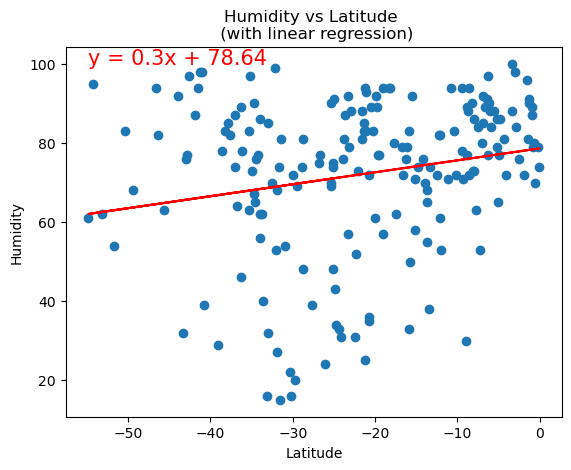

In [165]:
# Southern Hemisphere
lat_linregress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])

**Discussion about the linear relationship:** Only a very weak relationship to Latitude is shown in the Humidity data, with r-squared values each below 0.05.  It is interesting to note, subjectively, that humidity seems to be lowest at about 30 degrees in each hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared value is: 0.02909787671644558


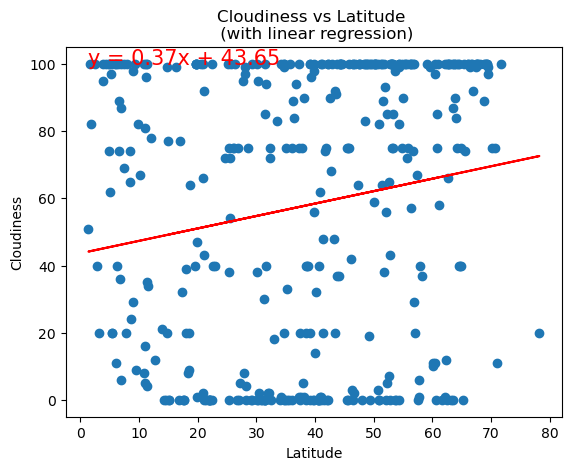

In [166]:
# Northern Hemisphere
lat_linregress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])

The r-squared value is: 0.005844683302781557


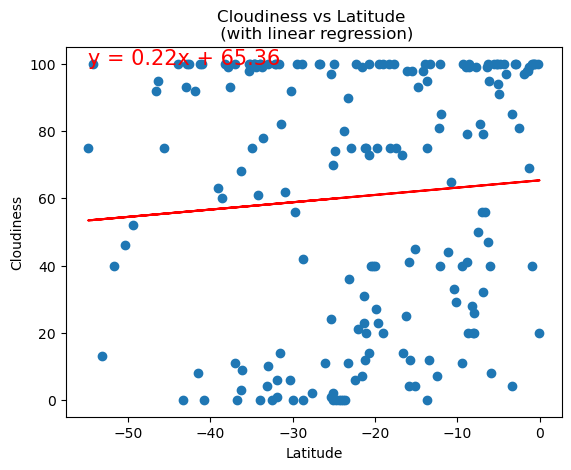

In [167]:
# Southern Hemisphere
lat_linregress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])

**Discussion about the linear relationship:** Cloudiness data shows almost no linear relationship to Latitude with r-squared values of ~0.03 and ~0.005.  It might be interesting to plot this versus Humidity instead.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared value is: 0.0031894726664654332


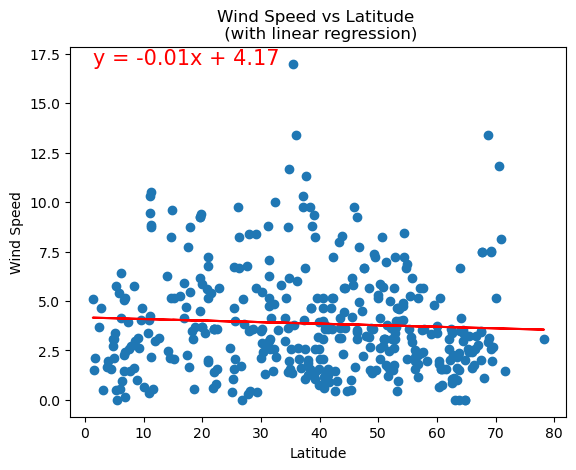

In [168]:
# Northern Hemisphere
lat_linregress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])

The r-squared value is: 0.1219623898244387


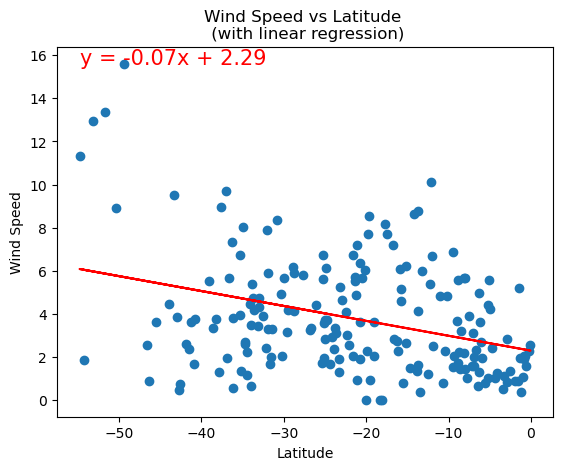

In [169]:
# Southern Hemisphere
lat_linregress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])

**Discussion about the linear relationship:** Wind Speed data shows almost no linear relationship in the Northern Hemisphere, with an r-squared value of ~0.003, and perhaps a very weak relationship in the Southern Hemisphere with an r-suared value of ~0.12.  One might suspect that if the Southern Hemisphere shows a weak linear relationship, that the Northern Hemisphere would as well.  More data points were collected form the Northern Hemisphere in this random selection, so one might suspect that a larger sample in the Southern Hemisphere would show this possible weak relationship to be an artifact of the sampling.  Larger data sets from each hemisphere could help to determine if this relationship is plausible or not.